In [1]:
#msleep.csv verisindeki sleep_total sütununun ortalamasını hesaplayan bir kod yazın.
import pandas as pd
df_animal = pd.read_csv("data/msleep.csv")
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [2]:
df_animal['sleep_total'].mean()

10.433734939759034

In [5]:
toplam = df_animal['sleep_total'].sum()
toplam
uzunluk = len(list(df_animal['sleep_total']))
uzunluk
ort = toplam/uzunluk
ort

10.433734939759034

In [7]:
# msleep.csv verisinde vore sütununda en sık tekrar eden değeri bulun.
df_animal['vore'].value_counts().index[0]

'herbi'

In [9]:
# sleep_total ve awake sütunları arasındaki korelasyonu hesaplayan bir Python kodu yazın.
df_animal['sleep_total'].corr(df_animal['awake'])

-0.9999985737040996

In [11]:
# bodywt sütununun IQR (interquartile range) değerini bulun ve aykırı değerleri tespit edin.
import numpy as np
from scipy.stats import iqr
iqr = iqr(df_animal['bodywt'])
lower = np.quantile(df_animal['bodywt'], 0.25) + 1.5 * iqr
upper = np.quantile(df_animal['bodywt'], 0.75) - 1.5 * iqr
df_animal[(df_animal['bodywt'] < lower) | (df_animal['bodywt'] > upper)]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [12]:
# msleep.csv verisinde, vore sütunu carni olanların awake sütunundaki en sık değerini bulun.
df_animal[df_animal['vore'] == 'carni']['awake'].mode()
df_animal[df_animal['vore'] == 'carni']['awake'].agg('mode')

0    11.5
Name: awake, dtype: float64

In [15]:
# sleep_total sütununun varyansını ve standart sapmasını hesaplayan bir kod yazın.
varyans = np.var(df_animal['sleep_total'], ddof=1)
varyans
np.sqrt(varyans)

4.4503569905705795

In [17]:
np.std(df_animal['sleep_total'], ddof=1)

4.4503569905705795

(array([15., 14., 28., 18.,  8.]),
 array([ 1.9,  5.5,  9.1, 12.7, 16.3, 19.9]),
 <BarContainer object of 5 artists>)

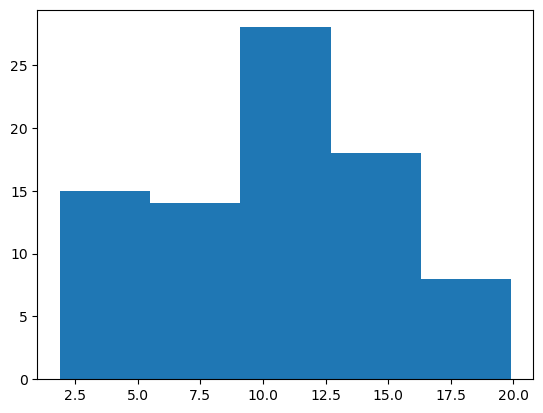

In [19]:
# msleep.csv verisinde, sleep_total sütununu 5 eşit aralığa bölen bir histogram çizdirin.
import matplotlib.pyplot as plt
plt.hist(df_animal['sleep_total'], bins=5)


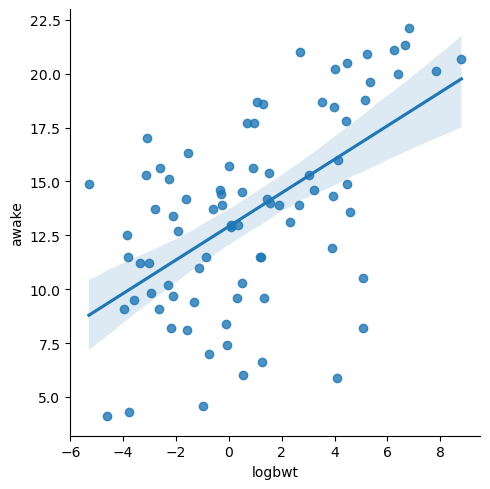

In [20]:
# bodywt sütunundaki verileri logaritmik dönüşüme tabi tutarak awake sütunu ile ilişkisini bir çizgi grafiği ile gösterin.
import seaborn as sns
df_animal['bodywt'].corr(df_animal['awake'])
df_animal['logbwt'] = np.log(df_animal['bodywt'])
sns.lmplot(x='logbwt', y='awake', data=df_animal)

In [22]:
# sleep_total sütunundaki en yüksek ve en düşük değerler arasındaki farkı hesaplayan bir kod yazın.
range = df_animal['sleep_total'].max() - df_animal['sleep_total'].min()
range

18.0

<Axes: >

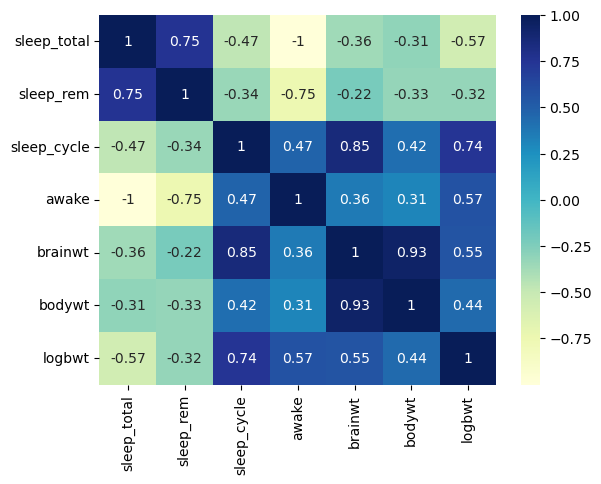

In [23]:
# msleep.csv verisindeki tüm sütunlar arasındaki korelasyon matrisini hesaplayarak bir ısı haritası (heatmap) olarak görselleştirin.
sns.heatmap(df_animal.corr(numeric_only=True),annot= True,cmap="YlGnBu")

In [27]:
# msleep.csv verisinde vore türüne göre sleep_total sütununun ortalamasını hesaplayın. 
#Ayrıca her bir vore türü için sleep_total ortalamasını sıralayın.
df_animal.groupby('vore')['sleep_total'].agg('mean')

vore
carni      10.378947
herbi       9.509375
insecti    14.940000
omni       10.925000
Name: sleep_total, dtype: float64

In [29]:
#msleep.csv verisinde order sütununa göre sleep_total ve awake sütunlarının toplamını hesaplayın. Sonuçları bir tablo halinde gösterin.
df_animal.groupby('order')[['sleep_total','awake']].sum()

,sleep_total,awake
order,,
Afrosoricida,15.6,8.4
Artiodactyla,27.1,116.9
Carnivora,121.4,166.6
Cetacea,13.5,58.6
Chiroptera,39.6,8.4
Cingulata,35.5,12.5
Didelphimorphia,37.4,10.6
Diprotodontia,24.8,23.2
Erinaceomorpha,20.4,27.6


In [31]:
# vore ve order sütunlarına göre sleep_total ortalamasını hesaplayarak gruplandırın ve azalan sırayla sıralayın.
df_animal.groupby(['vore','order'])['sleep_total'].mean().sort_values(ascending=False)

vore     order          
insecti  Chiroptera         19.800000
carni    Didelphimorphia    19.400000
insecti  Cingulata          18.100000
omni     Didelphimorphia    18.000000
carni    Cingulata          17.400000
omni     Afrosoricida       15.600000
carni    Rodentia           14.500000
herbi    Pilosa             14.400000
         Rodentia           13.356250
omni     Soricomorpha       11.433333
herbi    Diprotodontia      11.100000
carni    Primates           11.000000
omni     Primates           10.550000
carni    Carnivora          10.116667
omni     Erinaceomorpha     10.100000
herbi    Primates            9.500000
omni     Artiodactyla        9.100000
         Scandentia          8.900000
insecti  Monotremata         8.600000
omni     Rodentia            8.500000
insecti  Soricomorpha        8.400000
herbi    Lagomorpha          8.400000
         Hyracoidea          5.800000
carni    Cetacea             4.500000
herbi    Artiodactyla        3.600000
         Proboscidea     

In [33]:
#  Her vore türü için bodywt ortalamasını ve standart sapmasını aynı tabloda gösterin.
df_animal.groupby('vore')['bodywt'].agg(['mean', 'std'])

,mean,std
vore,,
carni,90.751105,182.070847
herbi,366.877250,1244.078662
insecti,12.921600,26.388527
omni,12.718000,24.693811


In [35]:
# order sütununa göre sleep_total ve awake sütunlarının medyanını hesaplayarak karşılaştırın.
df_animal.groupby('order')[['sleep_total', 'awake']].median()

,sleep_total,awake
order,,
Afrosoricida,15.60,8.40
Artiodactyla,3.90,20.10
Carnivora,10.25,13.75
Cetacea,5.20,18.80
Chiroptera,19.80,4.20
Cingulata,17.75,6.25
Didelphimorphia,18.70,5.30
Diprotodontia,12.40,11.60
Erinaceomorpha,10.20,13.80


In [37]:
# vore ve conservation durumlarına göre sleep_total ortalamalarını hesaplayın ve conservation durumuna göre sıralayın.
df_animal.groupby(['vore', 'conservation'])['sleep_total'].mean().sort_index(level='conservation')

vore     conservation
carni    cd               2.700000
herbi    cd               1.900000
carni    domesticated    11.300000
herbi    domesticated     6.300000
omni     domesticated     9.100000
carni    en              15.800000
herbi    en               9.100000
insecti  en              18.100000
carni    lc              13.920000
herbi    lc              10.110000
insecti  lc              14.050000
omni     lc              11.787500
carni    nt              10.400000
herbi    nt              13.833333
carni    vu               7.825000
herbi    vu               5.733333
Name: sleep_total, dtype: float64

In [39]:
#order sütununa göre sleep_total toplamını ve veri sayısını hesaplayarak, en yüksek toplam uyku süresine göre azalan sırayla sıralayın.
df_animal.groupby('order')['sleep_total'].agg(['sum','count']).sort_values(by='sum', ascending=False)

,sum,count
order,,
Rodentia,274.3,22
Primates,126.0,12
Carnivora,121.4,12
Soricomorpha,55.5,5
Chiroptera,39.6,2
Didelphimorphia,37.4,2
Cingulata,35.5,2
Artiodactyla,27.1,6
Diprotodontia,24.8,2


In [45]:
#order ve vore sütunlarına göre gruplandırarak her gruptaki hayvan sayısını ve awake sütununun ortalamasını aynı tabloda gösterin.
df_animal.groupby(['order','vore'])[['count','awake']].agg('mean')

KeyError: "Columns not found: 'count'"

In [47]:
# conservation statüsüne göre sleep_total ve awake sütunlarının maksimum ve minimum değerlerini hesaplayın.
df_animal.groupby('conservation')[['sleep_total','awake']].agg('min','max')

,sleep_total,awake
conservation,,
cd,1.9,21.35
domesticated,2.9,11.50
en,3.9,5.90
lc,3.0,4.30
nt,10.4,9.40
vu,3.3,10.50


In [49]:
# SELECT name FROM df_animal WHERE sleep_total IN (SELECT MAX(sleep_total) FROM df_animal);
df_animal[df_animal['sleep_total'] == df_animal['sleep_total'].max()]['name']

42    Little brown bat
Name: name, dtype: object

In [51]:
df_animal[df_animal['sleep_total'] == df_animal['sleep_total'].max()][['name']]

,name
42,Little brown bat


In [57]:
# SELECT order, AVG(sleep_total) FROM df_animal GROUP BY order HAVING AVG(sleep_total) > 10;
df_animal.groupby('sleep_total')

In [55]:
# SELECT vore, COUNT(*) FROM df_animal WHERE sleep_total > 10 GROUP BY vore;
df_animal[df_animal['sleep_total'] > 10].groupby('vore').size().reset_index()

,vore,0
0,carni,11
1,herbi,16
2,insecti,3
3,omni,9


In [118]:
#SELECT order, MAX(brainwt) FROM df_animal GROUP BY order;
df_animal.groupby('order')['brainwt'].max().reset_index()

,order,brainwt
0,Afrosoricida,0.0026
1,Artiodactyla,0.4230
2,Carnivora,0.3250
3,Cetacea,NaN
4,Chiroptera,0.0003
5,Cingulata,0.0810
6,Didelphimorphia,0.0063
7,Diprotodontia,0.0114
8,Erinaceomorpha,0.0035
9,Hyracoidea,0.0210


In [126]:
# SELECT order, COUNT(*) FROM df_animal GROUP BY order ORDER BY COUNT(*) DESC; ANLAMADIM
df_animal.groupby('order').size().reset_index(name='count').sort_values(by='count', ascending=False)


,order,count
16,Rodentia,22
2,Carnivora,12
14,Primates,12
1,Artiodactyla,6
18,Soricomorpha,5
12,Perissodactyla,3
9,Hyracoidea,3
3,Cetacea,3
7,Diprotodontia,2
8,Erinaceomorpha,2


In [59]:
# SELECT order, MIN(sleep_total) FROM df_animal WHERE vore = 'carni' GROUP BY order;
df_animal[df_animal['vore'] == 'carni'].groupby('order')['sleep_total'].min().reset_index()

,order,sleep_total
0,Carnivora,3.5
1,Cetacea,2.7
2,Cingulata,17.4
3,Didelphimorphia,19.4
4,Primates,11.0
5,Rodentia,14.5


In [65]:
# SELECT conservation, AVG(brainwt) FROM df_animal WHERE bodywt > 50 GROUP BY conservation;
df_animal[df_animal['bodywt'] > 50].groupby('conservation')['brainwt'].agg('mean').reset_index()

,conservation,brainwt
0,cd,NaN
1,domesticated,0.3704
2,en,2.3420
3,lc,0.3250
4,nt,0.1570
5,vu,2.9405


In [71]:
#SELECT vore, order, AVG(sleep_total) FROM df_animal GROUP BY vore, order ORDER BY AVG(sleep_total) DESC;
df_animal.groupby(['vore', 'order'])['sleep_total'].mean().sort_values(ascending=False).reset_index()

,vore,order,sleep_total
0,insecti,Chiroptera,19.800000
1,carni,Didelphimorphia,19.400000
2,insecti,Cingulata,18.100000
3,omni,Didelphimorphia,18.000000
4,carni,Cingulata,17.400000
5,omni,Afrosoricida,15.600000
6,carni,Rodentia,14.500000
7,herbi,Pilosa,14.400000
8,herbi,Rodentia,13.356250
9,omni,Soricomorpha,11.433333


In [75]:
# SELECT conservation, MAX(bodywt), MIN(bodywt) FROM df_animal GROUP BY conservation;
df_animal.groupby('conservation')['bodywt'].agg(['max', 'min']).reset_index()

,conservation,max,min
0,cd,899.995,800.000
1,domesticated,600.000,0.420
2,en,2547.000,0.120
3,lc,85.000,0.005
4,nt,100.000,0.022
5,vu,6654.000,1.670


In [79]:
# SELECT genus, MAX(sleep_total) FROM df_animal GROUP BY genus;
df_animal.groupby('genus')['sleep_total'].max().reset_index()

,genus,sleep_total
0,Acinonyx,12.1
1,Aotus,17.0
2,Aplodontia,14.4
3,Blarina,14.9
4,Bos,4.0
...,...,...
72,Tapirus,4.4
73,Tenrec,15.6
74,Tupaia,8.9
75,Tursiops,5.2


In [85]:
#SELECT vore, AVG(bodywt) FROM df_animal WHERE brainwt > 0.1 GROUP BY vore;
df_animal[df_animal['brainwt'] > 0.1].groupby('vore')['bodywt'].mean().reset_index()

,vore,bodywt
0,carni,92.500000
1,herbi,1350.687625
2,omni,40.414167


In [93]:
# SELECT order, COUNT(*) FROM df_animal WHERE sleep_total < 8 GROUP BY order;
df_animal[df_animal['sleep_total'] < 8].groupby('order').size().reset_index(name='count')


,order,count
0,Artiodactyla,5
1,Carnivora,3
2,Cetacea,3
3,Hyracoidea,3
4,Perissodactyla,3
5,Proboscidea,2
6,Rodentia,2


In [95]:
# SELECT vore, MIN(brainwt) FROM df_animal GROUP BY vore HAVING MIN(brainwt) > 0.005;
df_animal[df_animal['brainwt'] > 0.005].groupby('vore')['brainwt'].min().reset_index()

,vore,brainwt
0,carni,0.0108
1,herbi,0.0055
2,insecti,0.0250
3,omni,0.0063


In [ ]:
# SELECT conservation, AVG(awake) FROM df_animal GROUP BY conservation ORDER BY AVG(awake) DESC; tekrar bak!
df_animal.groupby('conservation')['awake'].mean().sort_values(ascending=False).reset_index()

In [97]:
# SELECT order, MAX(brainwt), MIN(brainwt) FROM df_animal GROUP BY order;
df_animal.groupby('order')['brainwt'].agg(['max', 'min']).reset_index()

,order,max,min
0,Afrosoricida,0.0026,0.00260
1,Artiodactyla,0.4230,0.09820
2,Carnivora,0.3250,0.01750
3,Cetacea,NaN,NaN
4,Chiroptera,0.0003,0.00025
5,Cingulata,0.0810,0.01080
6,Didelphimorphia,0.0063,0.00630
7,Diprotodontia,0.0114,0.01140
8,Erinaceomorpha,0.0035,0.00240
9,Hyracoidea,0.0210,0.01227


In [99]:
# SELECT vore, COUNT(*) FROM df_animal WHERE conservation = 'lc' GROUP BY vore;
df_animal[df_animal['conservation'] == 'lc'].groupby('vore').size().reset_index()

,vore,0
0,carni,5
1,herbi,10
2,insecti,2
3,omni,8


In [101]:
# SELECT genus, AVG(sleep_rem) FROM df_animal WHERE bodywt BETWEEN 1 AND 10 GROUP BY genus;
df_animal[df_animal['bodywt'].between(1,10)].groupby('genus')['sleep_rem'].mean().reset_index()

,genus,sleep_rem
0,Aplodontia,2.4
1,Bradypus,2.2
2,Cercopithecus,0.7
3,Cricetomys,2.0
4,Dasypus,3.1
5,Dendrohyrax,0.5
6,Didelphis,4.9
7,Erythrocebus,1.1
8,Felis,3.2
9,Genetta,1.3


In [105]:
# SELECT conservation, AVG(brainwt), COUNT(*) FROM df_animal WHERE awake > 12 GROUP BY conservation;
df_animal[df_animal['awake'] > 12].groupby('conservation')['brainwt'].agg('mean','count').reset_index()
df_animal[df_animal['awake'] > 12].groupby('conservation').agg(avg_brainwt=('brainwt', 'mean'), count=('brainwt', 'size')).reset_index()

,conservation,avg_brainwt,count
0,cd,NaN,2
1,domesticated,0.242450,8
2,en,4.603000,1
3,lc,0.058918,15
4,nt,0.157000,1
5,vu,2.940500,6


In [109]:
# : order sütununa göre sleep_total toplamını ve veri sayısını hesaplayarak, en yüksek toplam uyku süresine göre azalan sırayla sıralayın.
df_animal.groupby('order')['sleep_total'].agg('mean','size').sort_values(ascending=False).reset_index()
df_animal.groupby('order').agg(total_sleep=('sleep_total', 'sum'), count=('sleep_total', 'size')).sort_values(by='total_sleep', ascending=False).reset_index()

,order,total_sleep,count
0,Rodentia,274.3,22
1,Primates,126.0,12
2,Carnivora,121.4,12
3,Soricomorpha,55.5,5
4,Chiroptera,39.6,2
5,Didelphimorphia,37.4,2
6,Cingulata,35.5,2
7,Artiodactyla,27.1,6
8,Diprotodontia,24.8,2
9,Erinaceomorpha,20.4,2


In [115]:
# genus sütununa göre brainwt ortalamasını hesaplayın. Bu ortalamanın 0.02'den büyük olduğu grupları filtreleyin.
df_animal[df_animal['brainwt'] > 0.02].groupby('genus')['brainwt'].mean().reset_index()
df_animal.groupby('genus')['brainwt'].mean().loc[lambda x: x > 0.02].reset_index()

,genus,brainwt
0,Bos,0.42300
1,Canis,0.07000
2,Capreolus,0.09820
3,Capri,0.11500
4,Elephas,4.60300
5,Equus,0.53700
6,Erythrocebus,0.11500
7,Felis,0.02560
8,Haliochoerus,0.32500
9,Homo,1.32000


In [119]:
#vore sütununa göre bodywt değeri genel ortalamanın üzerinde olan hayvanların sayısını hesaplayın.
avgbwt = df_animal['bodywt'].mean()
df_animal[df_animal['bodywt'] > avgbwt].groupby('vore').size().reset_index()

,vore,0
0,carni,2
1,herbi,7


In [123]:
#order sütununa göre sleep_cycle maksimum değeri 1’den küçük olan grupları listeleyin.
df_animal.groupby('order')['sleep_cycle'].max().loc[lambda x: x < 1].reset_index()

,order,sleep_cycle
0,Artiodactyla,0.666667
1,Carnivora,0.416667
2,Chiroptera,0.200000
3,Cingulata,0.383333
4,Didelphimorphia,0.333333
5,Erinaceomorpha,0.283333
6,Lagomorpha,0.416667
7,Pilosa,0.766667
8,Rodentia,0.216667
9,Scandentia,0.233333


In [131]:
#conservation sütununa göre bodywt ortalamasını ve brainwt minimum değerini hesaplayın. Sadece vore değeri herbi olanları alın.
df_animal[df_animal['vore'] == 'herbi'].groupby('conservation')['bodywt'].agg(['mean','min']).reset_index()


,conservation,mean,min
0,cd,899.995000,899.995
1,domesticated,195.306857,0.420
2,en,1273.560000,0.120
3,lc,5.568400,0.053
4,nt,0.546000,0.022
5,vu,2287.723667,1.670


In [7]:
#order sütununa göre sleep_total toplamını ve veri sayısını hesaplayarak, en yüksek toplam uyku süresine göre azalan sırayla sıralayın.
df_animal.groupby('order').agg(total_sleep=('sleep_total', 'sum'), count=('sleep_total', 'size')).sort_values(by='total_sleep', ascending=False).reset_index()

,order,total_sleep,count
0,Rodentia,274.3,22
1,Primates,126.0,12
2,Carnivora,121.4,12
3,Soricomorpha,55.5,5
4,Chiroptera,39.6,2
5,Didelphimorphia,37.4,2
6,Cingulata,35.5,2
7,Artiodactyla,27.1,6
8,Diprotodontia,24.8,2
9,Erinaceomorpha,20.4,2


In [9]:
#vore sütununa göre bodywt ortalamasını ve brainwt maksimum değerini hesaplayın ve sonuçları brainwt değerine göre azalan sırayla sıralayın.
df_animal.groupby('vore').agg(avg_bodywt=('bodywt', 'mean'), max_brainwt=('brainwt', 'max')).sort_values(by='max_brainwt', ascending=False).reset_index()

KeyError: 'brainwt'

In [7]:
#order değeri Primates olan hayvanların toplam sleep_total süresini bulun.
df_animal[df_animal['order'] == 'Primates']['sleep_total'].sum()

126.00000000000001

In [9]:
#vore değeri carni olan hayvanların brainwt ortalamasını hesaplayın.
df_animal[df_animal['vore'] == 'carni']['brainwt'].mean()

0.07925555555555555

In [17]:
#sleep_total değeri 10 saatten fazla olan hayvanların sayısını bulun.
df_animal[df_animal['sleep_total'] > 10].shape[0]

name            44
genus           44
vore            39
order           44
conservation    28
sleep_total     44
sleep_rem       30
sleep_cycle     17
awake           44
brainwt         28
bodywt          44
dtype: int64

In [23]:
#awake süresi 15 saatten fazla olan ve conservation değeri nt olan hayvanların bodywt ortalamasını hesaplayın.
df_animal[(df_animal['awake'] > 15) & (df_animal['conservation'] == 'nt')]['bodywt'].mean()
df_animal[(df_animal['awake'] > 15) & (df_animal['conservation'] == 'nt')]['bodywt'].mean()

nan

In [25]:
#order değeri Carnivora olan hayvanların sayısını bulun
df_animal[df_animal['order'] == 'Carnivora'].shape[0]

12

In [27]:
#order sütununa göre sleep_total ortalamasını ve awake maksimum değerini hesaplayın. Sadece vore değeri carni olanları alın.
df_animal[df_animal['vore'] == 'carni'].groupby('order')['sleep_total'].agg(['mean','max'])

,mean,max
order,,
Carnivora,10.116667,15.8
Cetacea,4.500000,5.6
Cingulata,17.400000,17.4
Didelphimorphia,19.400000,19.4
Primates,11.000000,11.0
Rodentia,14.500000,14.5
